# CALORIE BURNT PREDICTION

In [43]:
# STEP 1 : importing libraries and dataset

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('C:/Users/gyanada/Downloads/calories.csv')
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [46]:
df1 = pd.read_csv('C:/Users/gyanada/Downloads/exercise.csv')
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [47]:
df.shape

(15000, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [49]:
df.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [50]:
#Merge datasets

In [51]:
dfnew = pd.merge(df, df1, on='User_ID')

In [52]:
# STEP 2 : EDA

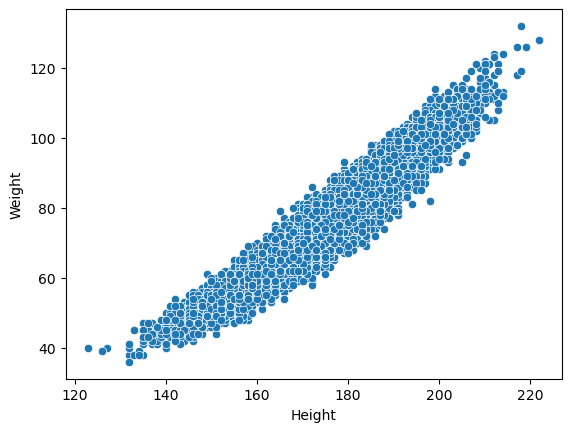

In [53]:
sb.scatterplot(x='Height', y='Weight', data=df1) 
plt.show()

In [54]:
# The above graph shows linear relationship between weight and hieght.

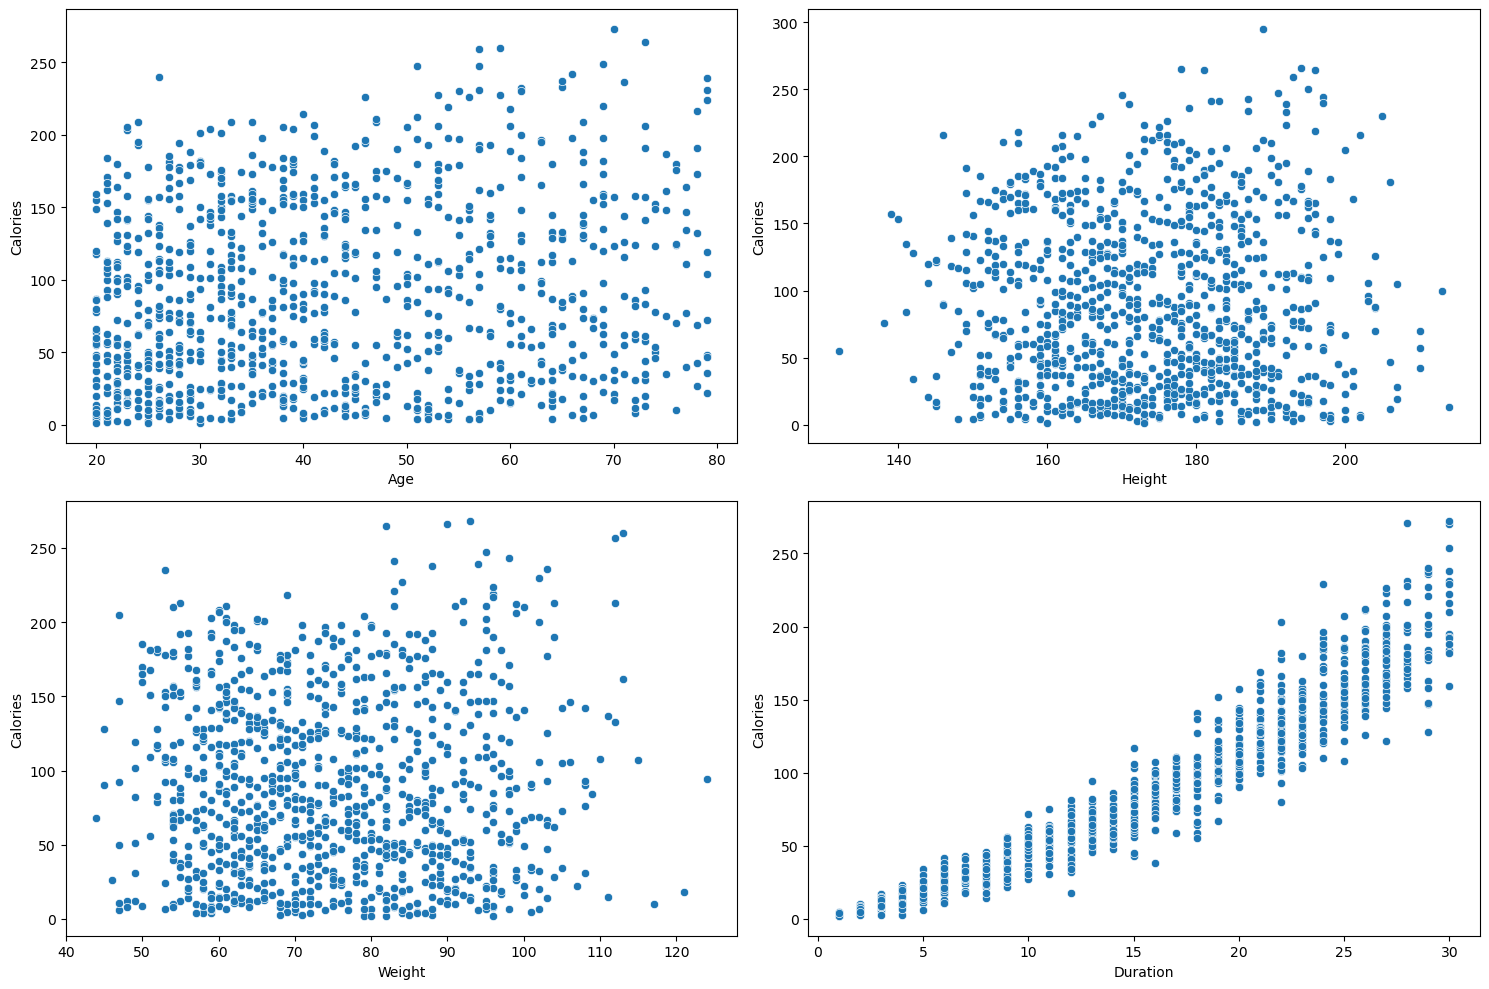

In [55]:
# Plot scatter plots
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sample_data = dfnew.sample(1000)  # Take a sample of the merged data
    sb.scatterplot(x=col, y='Calories', data=sample_data)
plt.tight_layout()
plt.show()

In [56]:
# 1) We can observe that calories burnt is increasing with the increase in duration of exercise

In [57]:
print("dfnew columns:", dfnew.columns)

dfnew columns: Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


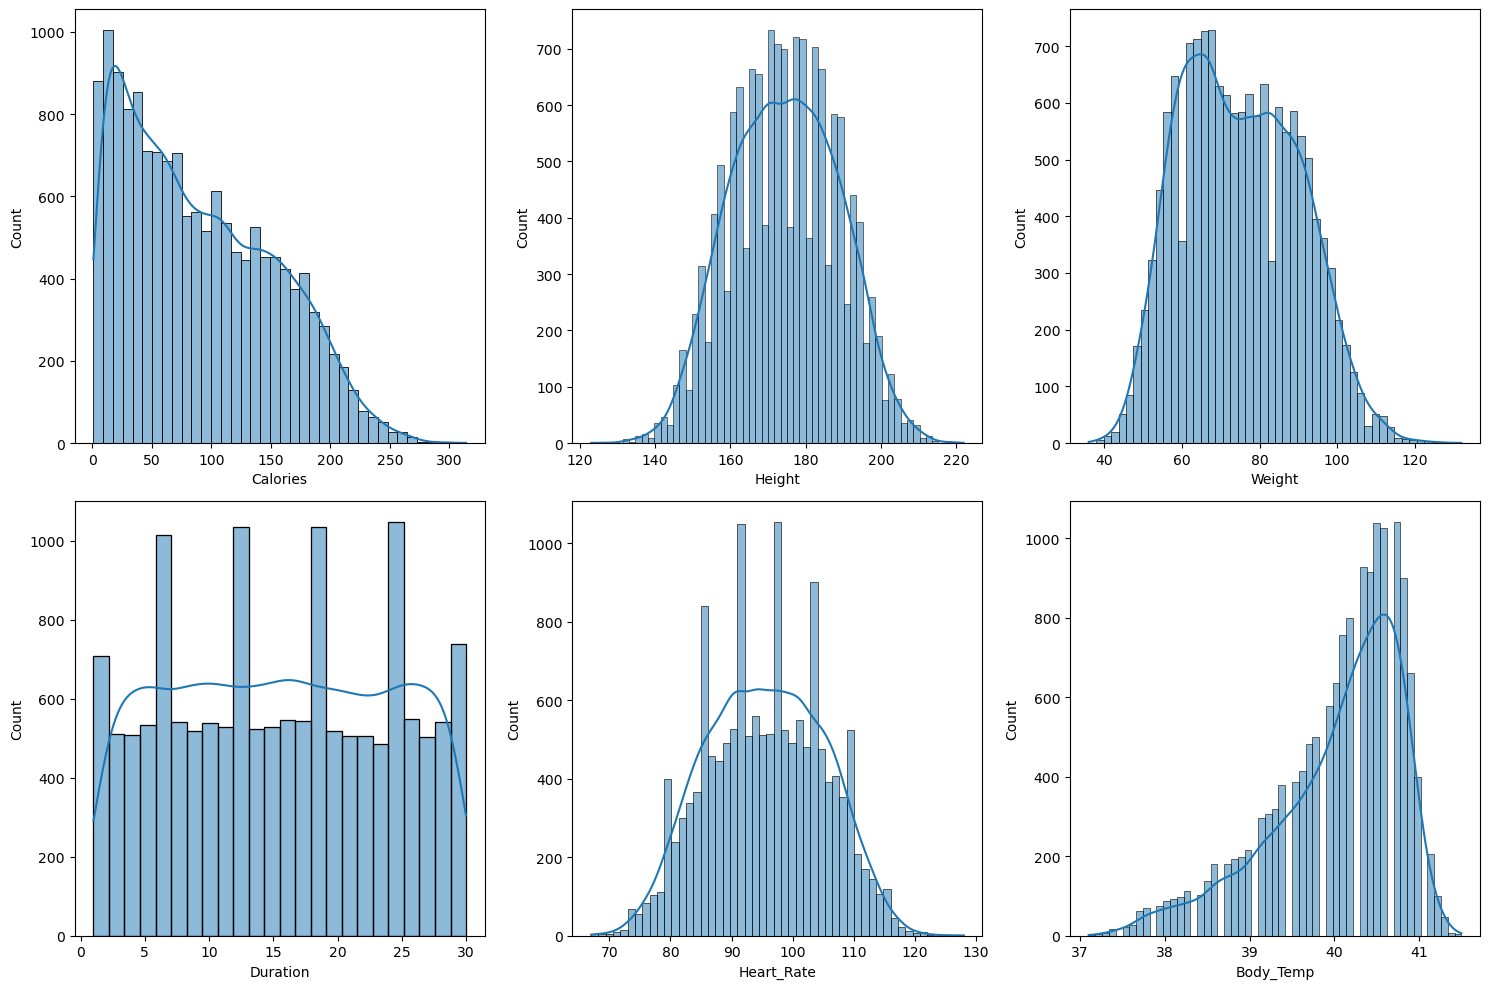

In [58]:
features = dfnew.select_dtypes(include='float').columns 
plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(dfnew[col], kde=True) 
plt.tight_layout()
plt.show()


In [59]:
dfnew.replace({'male': 0, 'female': 1},
           inplace=True)
dfnew.head()


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


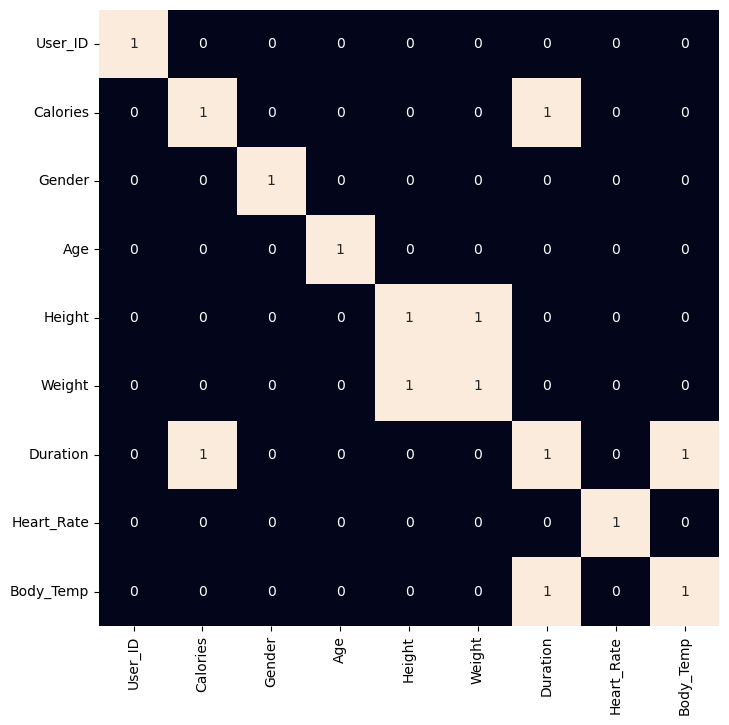

In [60]:
plt.figure(figsize=(8, 8))
sb.heatmap(dfnew.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()


In [61]:
# We have a features weight and duration highly correlated with the targetted column which causes a problem of data leakage 

In [62]:
# STEP 3 : MODEL TRAINING

In [63]:
features = dfnew.drop(['User_ID', 'Calories'], axis=1)
target = dfnew['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 7), (1500, 7))

In [64]:
# Normilizing features
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [65]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  8.34589243919239
Validation Error :  8.410690094668826

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.9499125303383227
Validation Error :  1.3646511841813724

Lasso() : 
Training Error :  9.040389368469116
Validation Error :  9.08577618

In [66]:
# We must focus on models that have a reasonable balance between training and validation errors.
# So to proceed, choosing XGBRegressor and RandomForestRegressor.

In [67]:
#HyperParameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score: 0.9993372165710277


In [69]:
from sklearn.model_selection import cross_val_score

model = XGBRegressor()
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE: {cv_scores.mean()}")

Cross-Validation MAE: -1.5209474444574227


In [70]:
# training with optimal parameters

In [71]:
from xgboost import XGBRegressor
final_model = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
final_model.fit(X_train, Y_train)
val_preds = final_model.predict(X_val)
val_error = mae(Y_val, val_preds)
print(f"Validation MAE with Best Parameters: {val_error}")


Validation MAE with Best Parameters: 1.4556184752782186


In [72]:
X_train, X_temp, Y_train, Y_temp = train_test_split(features, target, test_size=0.2, random_state=22)  # 80% for training, 20% for testing/validation
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=22)  # 50% for validation, 50% for testing
print("Training set:", X_train.shape, Y_train.shape)
print("Validation set:", X_val.shape, Y_val.shape)
print("Test set:", X_test.shape, Y_test.shape)


Training set: (12000, 7) (12000,)
Validation set: (1500, 7) (1500,)
Test set: (1500, 7) (1500,)


In [73]:
test_preds = final_model.predict(X_test)
test_error = mae(Y_test, test_preds)
print(f"Test MAE: {test_error}")


Test MAE: 199.71546497599283


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
import joblib

# Define the RandomForestRegressor with faster configuration
final_model = RandomForestRegressor(
    n_estimators=100,  # Reduced number of trees
    max_depth=5,       # Shallower trees for faster training
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Train the model on the full training set
final_model.fit(X_train, Y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

test_mae = mae(Y_test, test_preds)
print(f"Final Test MAE: {test_mae}")

joblib.dump(final_model, 'optimized_random_forest_model.pkl')
print("Final model saved as 'optimized_random_forest_model.pkl'.")

sample_data = X_test.iloc[:5] 
sample_preds = final_model.predict(sample_data)
print("Sample Predictions:", sample_preds)


Final Test MAE: 6.720639935007498
Final model saved as 'optimized_random_forest_model.pkl'.
Sample Predictions: [ 11.50540574  62.01833479  69.93479064  93.37245143 227.76569351]


In [75]:
#The Mean Absolute Error (MAE) on the test set is 6.72, which indicates that, on average, the predicted calorie burn values differ from the actual values by only 6.72 calories.
#This low MAE signifies that the model performs well and is highly accurate in predicting calorie burn.